In [1]:
#https://docs.python.org/3/library/random.html
import random
random.seed(a=2)
import pandas as pd
import matplotlib.pyplot as plt

count    1000.000000
mean       -0.103340
std         5.014997
min       -18.173466
25%        -3.527966
50%        -0.022726
75%         3.318282
max        14.773928
Name: x, dtype: float64


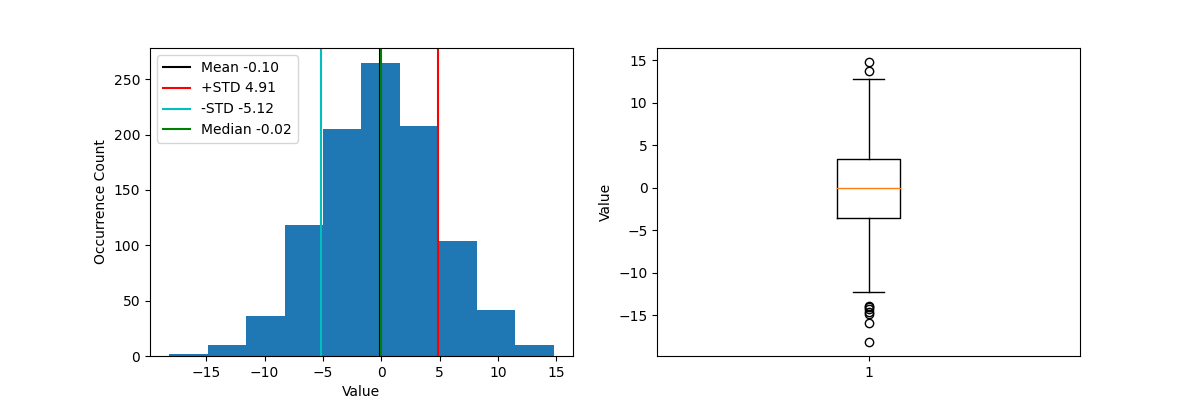

In [2]:
randdata = pd.DataFrame({'x':[random.gauss(0,5) for a in range(1000)]})
#randdata = pd.DataFrame({'x':[random.weibullvariate(1,25) for a in range(1000)]})
#randdata = pd.DataFrame({'x':[random.normalvariate(0,5) for a in range(1000)]})
#randdata = pd.DataFrame({'x':[random.lognormvariate(1,1.12) for a in range(1000)]})
print(randdata['x'].describe())
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(randdata['x'])
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist
ax[0].axvline(x=randdata['x'].mean(),c='k',label='Mean {:.2f}'.format(randdata['x'].mean()))
ax[0].axvline(x=randdata['x'].mean()+randdata['x'].std(),c='r',label='+STD {:.2f}'.format(randdata['x'].mean()+randdata['x'].std()))
ax[0].axvline(x=randdata['x'].mean()-randdata['x'].std(),c='c',label='-STD {:.2f}'.format(randdata['x'].mean()-randdata['x'].std()))
ax[0].axvline(x=randdata['x'].median(),c='g',label='Median {:.2f}'.format(randdata['x'].median()))
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Occurrence Count')
ax[1].boxplot(randdata['x'])
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
#      Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
#                   |-----:-----|
#   o      |--------|     :     |--------|    o  o
#                   |-----:-----|
# flier             <----------->            fliers
#                        IQR
ax[1].set_ylabel('Value')
ax[0].legend()
plt.show()

In [1]:

from scipy.stats import binomtest

In [4]:
result = binomtest(1, n=15, p=0.1, alternative='greater')

result.pvalue

0.794108867905351

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [5]:
import numpy as np

from sklearn.datasets import load_iris

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

In [6]:
random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

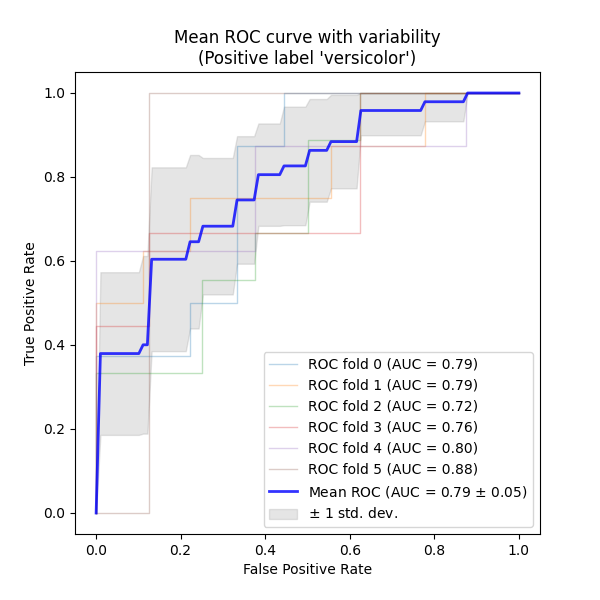

In [8]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.legend(loc="lower right")
plt.show()